In [25]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import helper


# Anlisi inziale csv


ricerca e rimozione di file audio duplicati. Lettura file csv originale.

In [26]:
audio_df = pd.read_csv('audio_features_dataset.csv')

stampa file audio

In [27]:
audio_df

,Nome file,Classe,Sottoclasse,Ampiezza del segnale,Durata,Frequenza,Numero di canali,Fase,Frequenza massima interna,Bit Depth,Forma d'onda
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7,Non-Target,Ambient Noise,0.226026,31.207619,44100,1,-0.068573,0.0,MPEG,"(1376256,)"
1,2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61,Non-Target,Ambient Noise,0.646487,31.207619,44100,1,0.003324,0.0,MPEG,"(1376256,)"
2,2f574049-3325-446c-a8ac-2e5b31e9e32f,Non-Target,Ambient Noise,0.391676,31.207619,44100,1,-0.031078,0.0,MPEG,"(1376256,)"
3,30679527-fd7a-4cad-8c7d-cb1bcc07604d,Non-Target,Ambient Noise,0.200377,31.207619,44100,1,0.013213,0.0,MPEG,"(1376256,)"
4,f9652ad2-39f5-41b4-a8e4-89171a864f03,Non-Target,Ambient Noise,0.753663,31.207619,44100,1,0.050887,0.0,MPEG,"(1376256,)"
...,...,...,...,...,...,...,...,...,...,...,...
2658,SanctSound_OC01_03_ship_20191106T223751Z,Target,Vessel,0.251221,5.305042,48000,1,0.000000,0.0,Signed,"(254642,)"
2659,SanctSound_OC02_01_ship_20190419T233040Z,Target,Vessel,0.326813,60.000000,48000,1,0.000000,0.0,Signed,"(2880000,)"
2660,SanctSound_OC03_02_ship_20200228T080107Z,Target,Vessel,0.251221,60.000000,48000,1,-0.000031,0.0,Signed,"(2880000,)"
2661,SanctSound_SB03_09_vessel_20200415T161235Z,Target,Vessel,0.251129,5.000021,48000,1,0.000000,0.0,Signed,"(240001,)"


ricerca duplicati

In [28]:
duplicates = audio_df[audio_df.duplicated(subset=['Nome file'],keep=False)]
duplicates

,Nome file,Classe,Sottoclasse,Ampiezza del segnale,Durata,Frequenza,Numero di canali,Fase,Frequenza massima interna,Bit Depth,Forma d'onda
103,72021005,Non-Target,Bearded Seal,0.550293,142.500000,10240,1,0.000977,0.0,Signed,"(1459200,)"
104,7202100T,Non-Target,Bearded Seal,0.449707,2.835938,10240,1,-0.010254,0.0,Signed,"(29040,)"
105,7202100V,Non-Target,Bearded Seal,0.341309,2.835938,10240,1,-0.021973,0.0,Signed,"(29040,)"
106,7202100Z,Non-Target,Bearded Seal,0.509766,2.465625,10240,1,-0.019043,0.0,Signed,"(25248,)"
108,78018002,Non-Target,Bearded Seal,0.749512,45.300000,10240,1,-0.169434,0.0,Signed,"(463872,)"
109,78018003,Non-Target,Bearded Seal,0.547363,11.343750,10240,1,-0.102539,0.0,Signed,"(116160,)"
111,7801800B,Non-Target,Bearded Seal,0.557129,2.751562,10240,1,-0.203613,0.0,Signed,"(28176,)"
112,7801800D,Non-Target,Bearded Seal,0.618164,2.751562,10240,1,-0.048828,0.0,Signed,"(28176,)"
113,7801800H,Non-Target,Bearded Seal,0.665527,3.618750,10240,1,-0.229980,0.0,Signed,"(37056,)"
114,7801800J,Non-Target,Bearded Seal,0.600098,3.618750,10240,1,0.175781,0.0,Signed,"(37056,)"


risultano 50 file audio duplicati. Procedere con la rimozione

In [29]:
audio_df.drop_duplicates(subset=['Nome file'], keep=False, inplace=True)

stampa dataframe finale senza duplicati.

In [30]:
audio_df

,Nome file,Classe,Sottoclasse,Ampiezza del segnale,Durata,Frequenza,Numero di canali,Fase,Frequenza massima interna,Bit Depth,Forma d'onda
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7,Non-Target,Ambient Noise,0.226026,31.207619,44100,1,-0.068573,0.0,MPEG,"(1376256,)"
1,2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61,Non-Target,Ambient Noise,0.646487,31.207619,44100,1,0.003324,0.0,MPEG,"(1376256,)"
2,2f574049-3325-446c-a8ac-2e5b31e9e32f,Non-Target,Ambient Noise,0.391676,31.207619,44100,1,-0.031078,0.0,MPEG,"(1376256,)"
3,30679527-fd7a-4cad-8c7d-cb1bcc07604d,Non-Target,Ambient Noise,0.200377,31.207619,44100,1,0.013213,0.0,MPEG,"(1376256,)"
4,f9652ad2-39f5-41b4-a8e4-89171a864f03,Non-Target,Ambient Noise,0.753663,31.207619,44100,1,0.050887,0.0,MPEG,"(1376256,)"
...,...,...,...,...,...,...,...,...,...,...,...
2658,SanctSound_OC01_03_ship_20191106T223751Z,Target,Vessel,0.251221,5.305042,48000,1,0.000000,0.0,Signed,"(254642,)"
2659,SanctSound_OC02_01_ship_20190419T233040Z,Target,Vessel,0.326813,60.000000,48000,1,0.000000,0.0,Signed,"(2880000,)"
2660,SanctSound_OC03_02_ship_20200228T080107Z,Target,Vessel,0.251221,60.000000,48000,1,-0.000031,0.0,Signed,"(2880000,)"
2661,SanctSound_SB03_09_vessel_20200415T161235Z,Target,Vessel,0.251129,5.000021,48000,1,0.000000,0.0,Signed,"(240001,)"


# Analisi dataset

lettura file csv e conversione in un dataframe pandas


In [31]:
df = pd.read_csv("audio_features_dataset_no_duplicates.csv")

estrarre informazioni dal dataframe

In [32]:
amplitudes = df['Ampiezza del segnale'].tolist()
durations = df['Durata'].tolist()
frequencies = df['Frequenza'].tolist()
num_channels_list = df['Numero di canali'].tolist()
phases = df['Fase'].tolist()
max_internal_frequencies = df['Frequenza massima interna'].tolist()
bit_depths = df['Bit Depth'].tolist()

funzione per creazione grafiici generici

In [33]:
def plot_distribution(values, title, x_label):
    counter = Counter(values)
    unique_values = sorted(counter.keys())
    counts = [counter[value] for value in unique_values]

    plt.figure(figsize=(12, 8))
    bar_width = 0.8  
    indices = range(len(unique_values))

    bars = plt.bar(indices, counts, color='skyblue', edgecolor='black', width=bar_width)

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(count), ha='center', va='bottom', fontsize=10)

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel('Occorrenze', fontsize=14)
    plt.xticks(indices, unique_values, rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Distribuzione dei valori di numero di canali

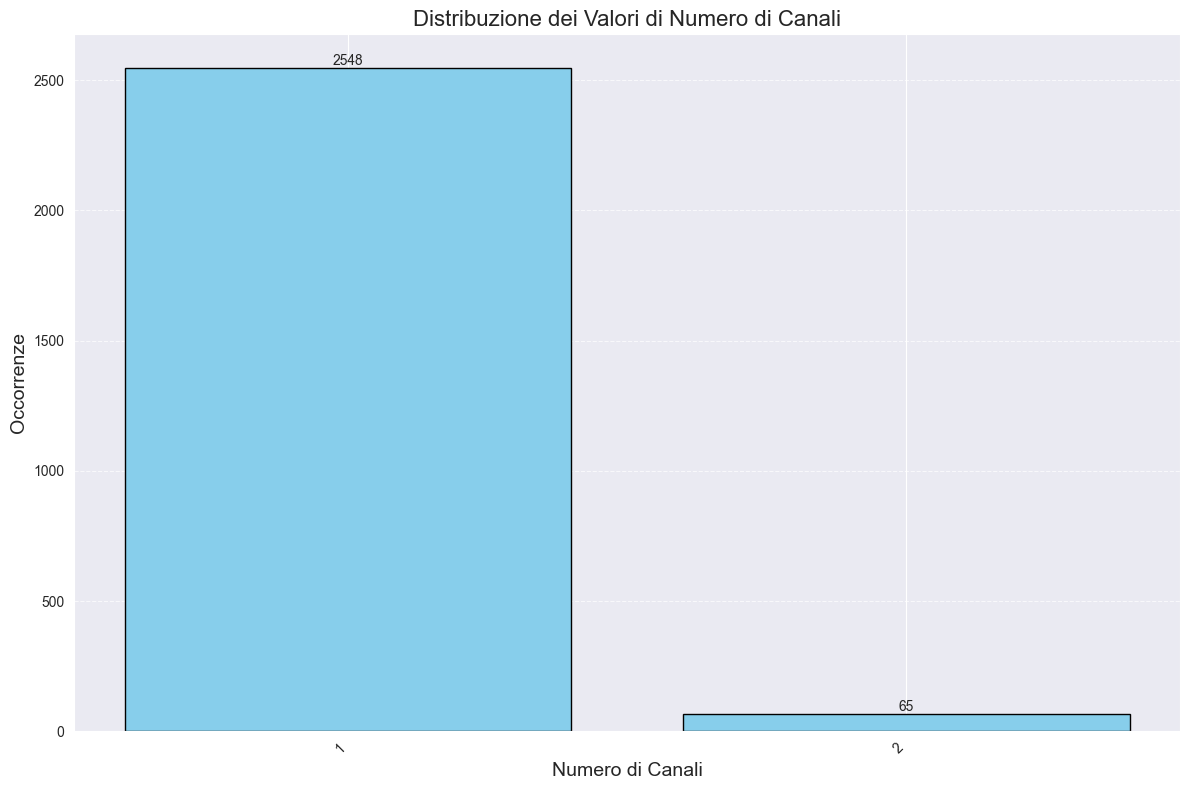

In [34]:
plot_distribution(num_channels_list, 'Distribuzione dei Valori di Numero di Canali', 'Numero di Canali')

# Bit Depth

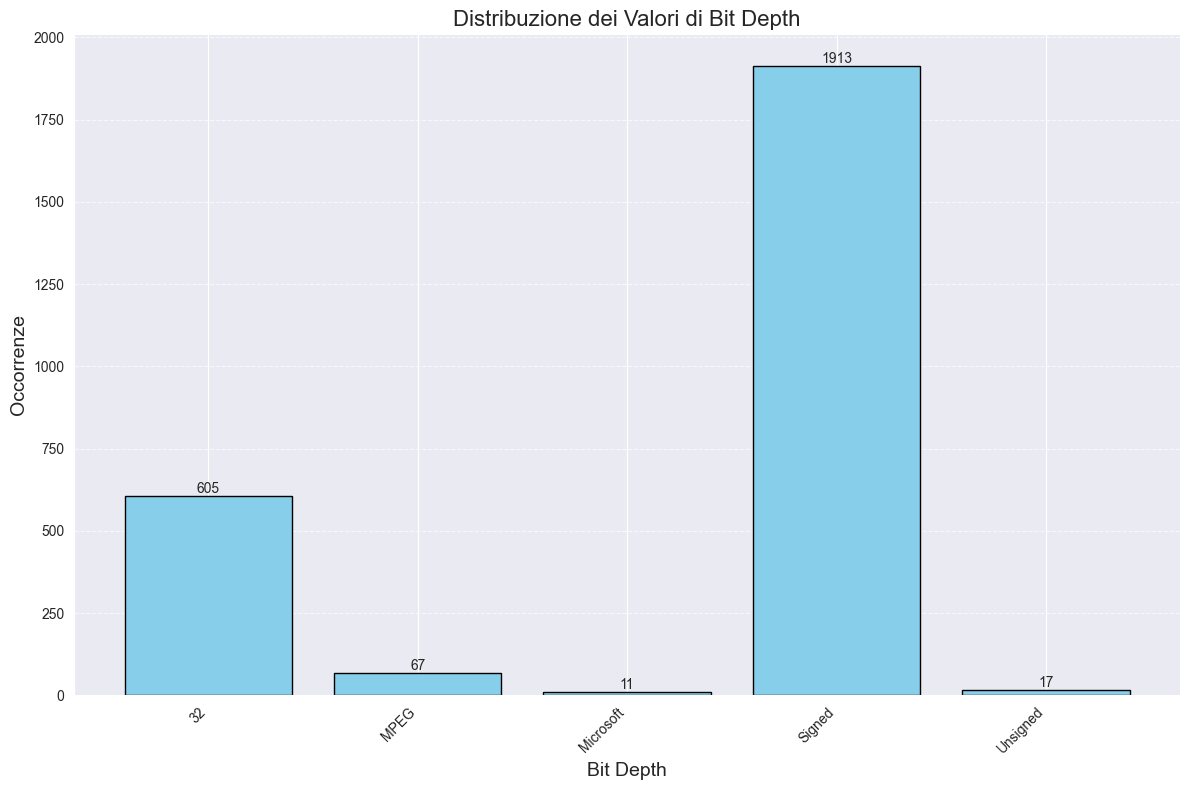

In [35]:
plot_distribution(bit_depths, 'Distribuzione dei Valori di Bit Depth', 'Bit Depth')

# Statistiche sulle classi

In [36]:
df_target = helper.estrai_classe_target(df)
df_target

,Nome file,Classe,Sottoclasse,Ampiezza del segnale,Durata,Frequenza,Numero di canali,Fase,Frequenza massima interna,Bit Depth,Forma d'onda
1950,AHD_Airmar,Target,Acoustic Harassment Devices,0.762299,6.501587,44100,2,0.000000,0.0,Signed,"(286720,)"
1951,SanctSound_CI04_04_acousticrelease_20200202T07...,Target,Acoustic release,1.000000,10.185667,48000,1,0.000000,0.0,Signed,"(488912,)"
1952,20171104-1_1,Target,Cargo,0.152562,457.000000,32000,1,0.027270,0.0,32,"(14624000,)"
1953,20171104a-2_2,Target,Cargo,0.077119,440.000000,32000,1,0.027292,0.0,32,"(14080000,)"
1954,20171105a-3_3,Target,Cargo,0.162010,297.000000,32000,1,0.032642,0.0,32,"(9504000,)"
...,...,...,...,...,...,...,...,...,...,...,...
2608,SanctSound_OC01_03_ship_20191106T223751Z,Target,Vessel,0.251221,5.305042,48000,1,0.000000,0.0,Signed,"(254642,)"
2609,SanctSound_OC02_01_ship_20190419T233040Z,Target,Vessel,0.326813,60.000000,48000,1,0.000000,0.0,Signed,"(2880000,)"
2610,SanctSound_OC03_02_ship_20200228T080107Z,Target,Vessel,0.251221,60.000000,48000,1,-0.000031,0.0,Signed,"(2880000,)"
2611,SanctSound_SB03_09_vessel_20200415T161235Z,Target,Vessel,0.251129,5.000021,48000,1,0.000000,0.0,Signed,"(240001,)"


In [37]:
df_notarget = helper.estrai_classe_noTarget(df)
df_notarget

,Nome file,Classe,Sottoclasse,Ampiezza del segnale,Durata,Frequenza,Numero di canali,Fase,Frequenza massima interna,Bit Depth,Forma d'onda
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7,Non-Target,Ambient Noise,0.226026,31.207619,44100,1,-0.068573,0.0,MPEG,"(1376256,)"
1,2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61,Non-Target,Ambient Noise,0.646487,31.207619,44100,1,0.003324,0.0,MPEG,"(1376256,)"
2,2f574049-3325-446c-a8ac-2e5b31e9e32f,Non-Target,Ambient Noise,0.391676,31.207619,44100,1,-0.031078,0.0,MPEG,"(1376256,)"
3,30679527-fd7a-4cad-8c7d-cb1bcc07604d,Non-Target,Ambient Noise,0.200377,31.207619,44100,1,0.013213,0.0,MPEG,"(1376256,)"
4,f9652ad2-39f5-41b4-a8e4-89171a864f03,Non-Target,Ambient Noise,0.753663,31.207619,44100,1,0.050887,0.0,MPEG,"(1376256,)"
...,...,...,...,...,...,...,...,...,...,...,...
1945,SanctSound_HI04_03_windwaves_20201220115634Z_3...,Non-Target,Wind and wave,0.654724,18.000354,48000,1,0.000000,0.0,Signed,"(864017,)"
1946,SanctSound_MB02_04_wind_20200101T225838Z_36dBgain,Non-Target,Wind and wave,0.494232,18.000000,48000,1,-0.000031,0.0,Signed,"(864000,)"
1947,SanctSound_OC02_03_wind_20191205T223352Z_50dBgain,Non-Target,Wind and wave,0.386200,7.480000,4000,1,-0.000031,0.0,Signed,"(29920,)"
1948,SanctSound_PM05_01_windwaves_20191113T090002Z_...,Non-Target,Wind and wave,0.614258,15.011708,48000,1,0.000000,0.0,Signed,"(720562,)"


Sample in Target

samples for Target Class:
Sottoclasse
Tanker                              240
Passengership                       195
Cargo                               111
Tug                                  69
Vessel                               24
Sonar                                 7
Echosounder                           4
Scuba divers                          2
Seal bomb                             2
Seismic airguns surveys               2
Underwater Communication Signals      2
Acoustic Harassment Devices           1
Acoustic release                      1
Explosion                             1
Fishing pinger                        1
Seafloor fossil fuel processing       1
Name: count, dtype: int64


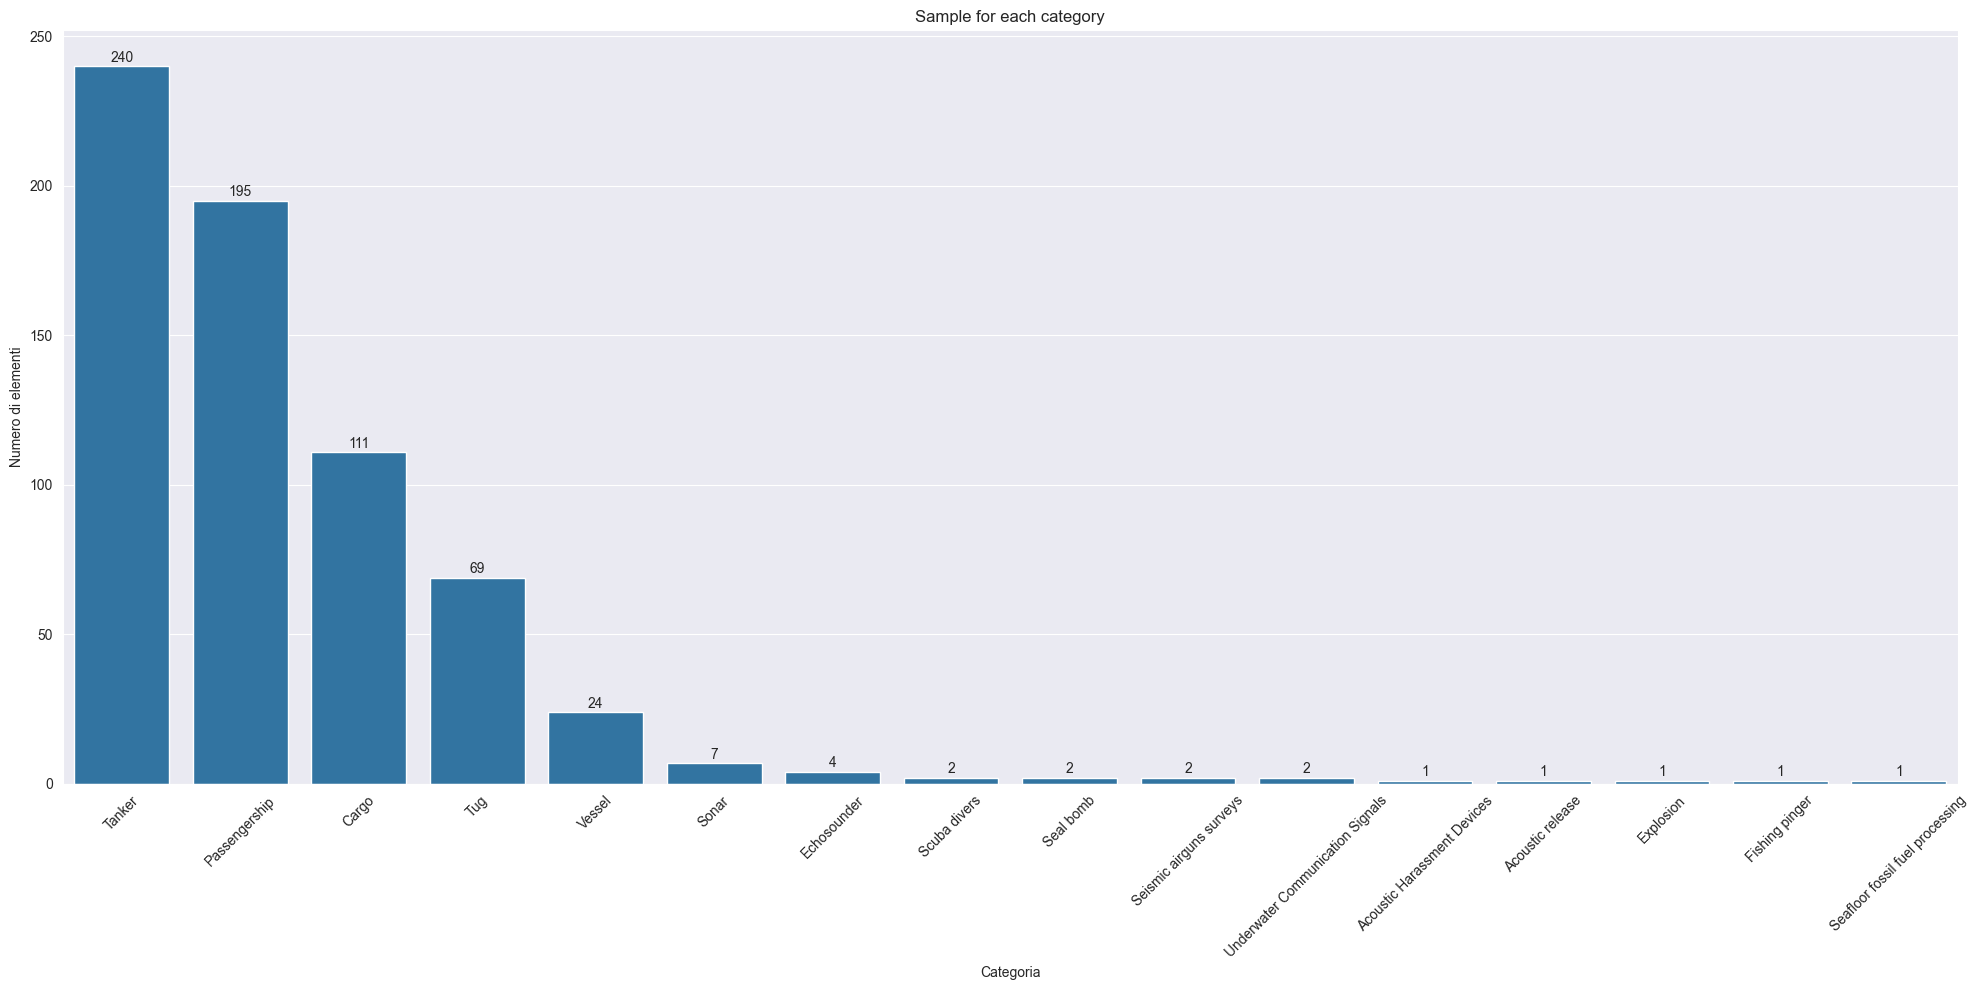

In [38]:
helper.sample_counter(df_target)

Sample in Not-Target

samples for Non-Target Class:
Sottoclasse
Spinner Dolphin              114
Fraser_s Dolphin              91
Humpback Whale                90
Striped Dolphin               85
Long-Finned Pilot Whale       72
                            ... 
Northern bottlenose whale      1
Bryde_s Whale                  1
Sea lion                       1
Gray Seal                      1
Red grouper                    1
Name: count, Length: 96, dtype: int64


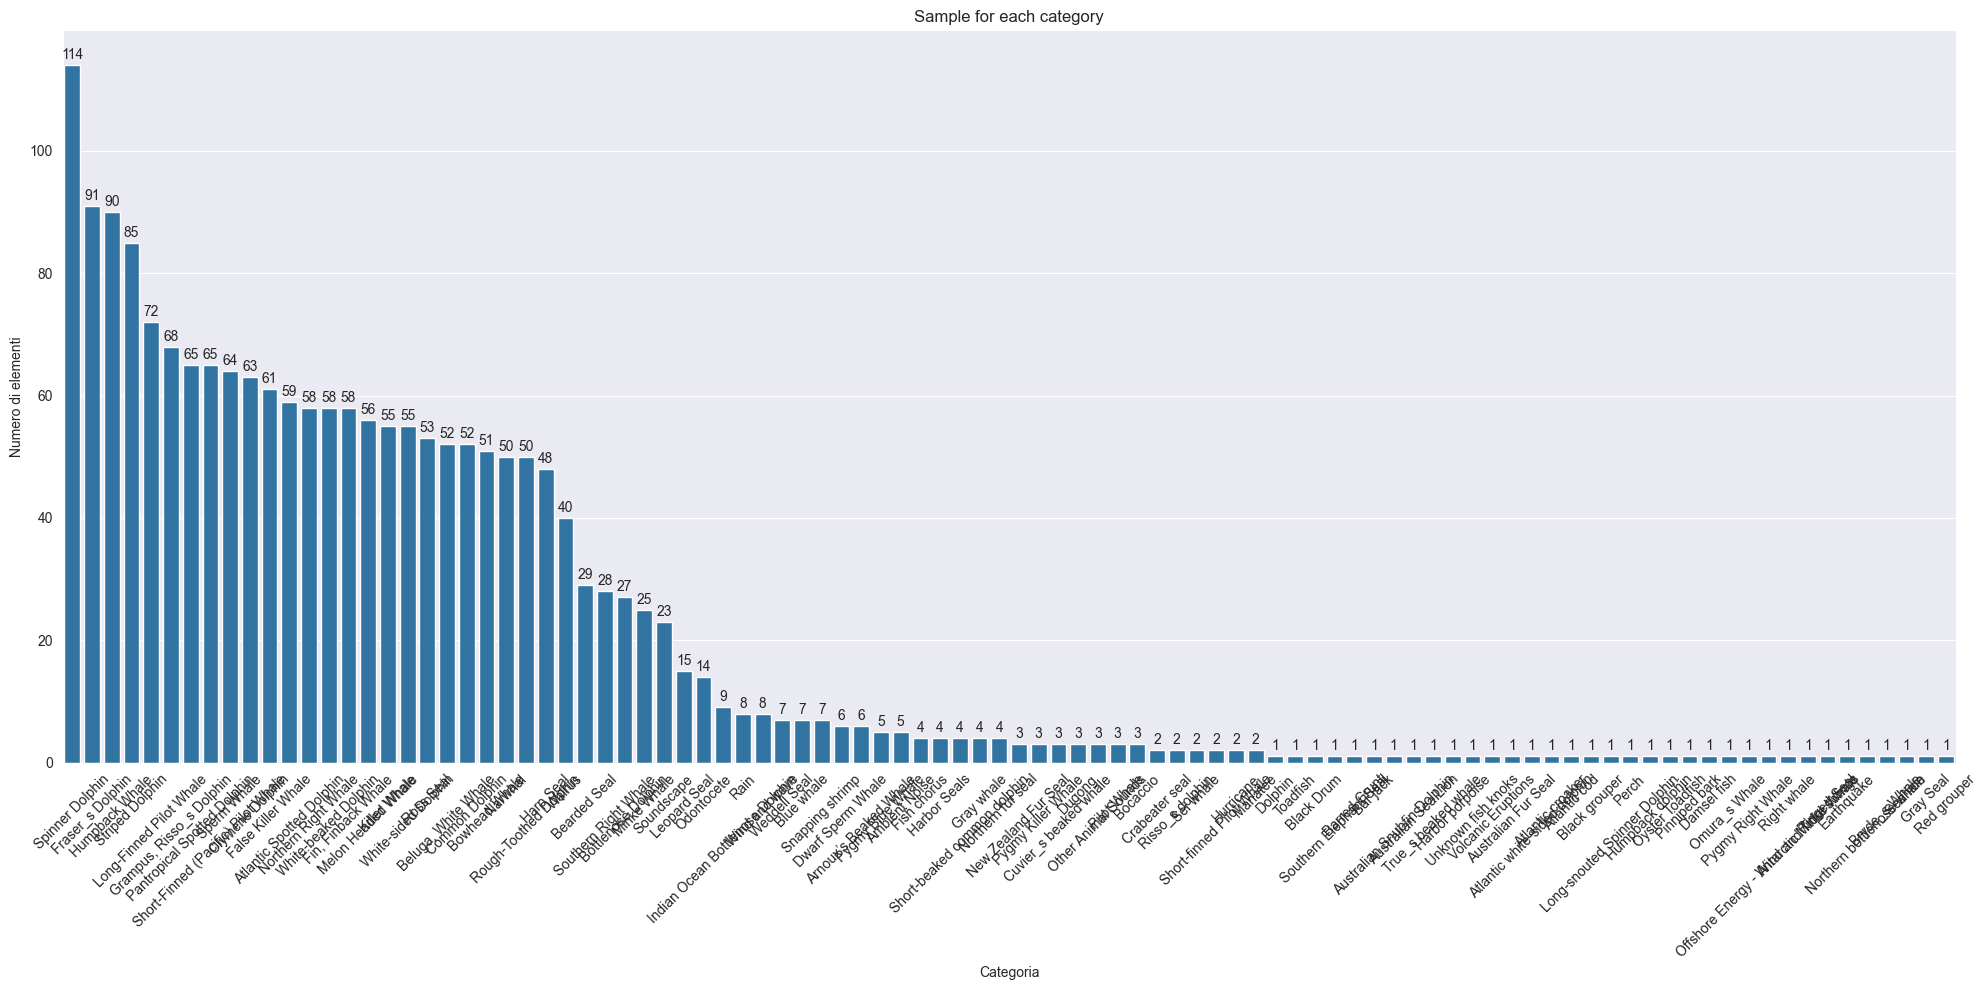

In [39]:
helper.sample_counterNot(df_notarget)

# Sample rates

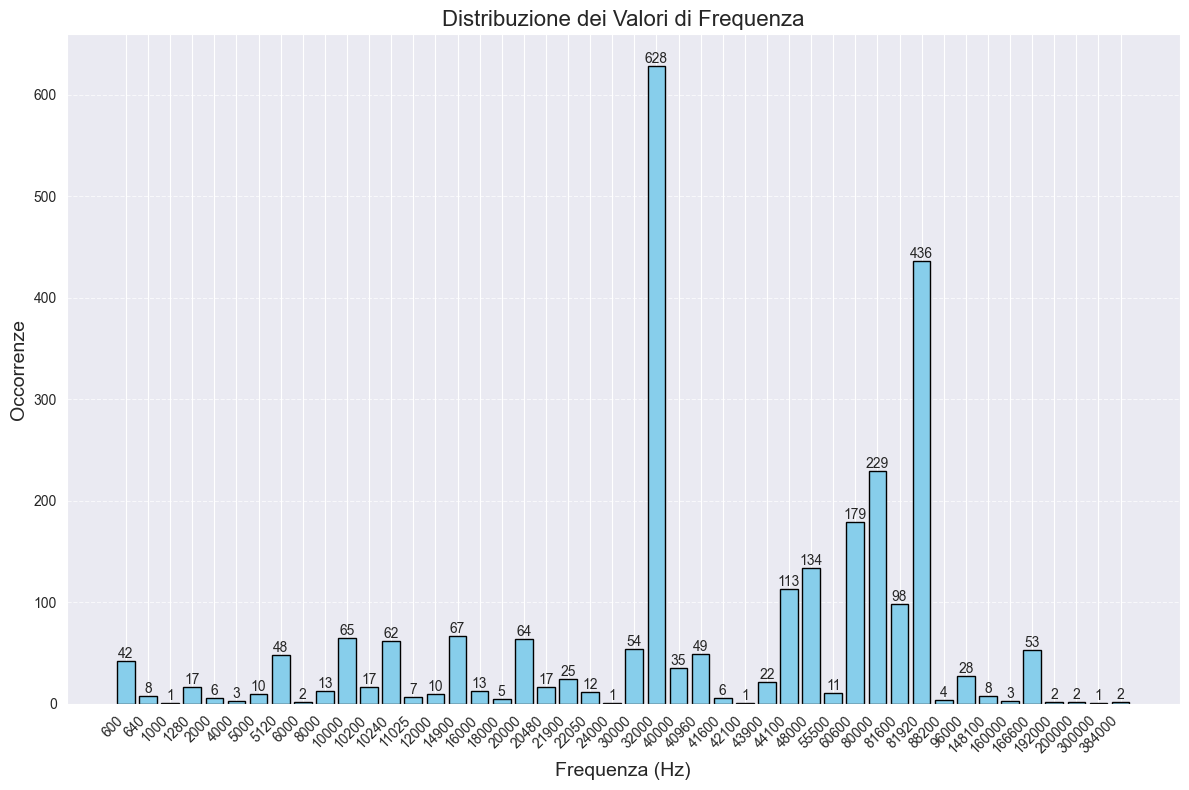

In [40]:
plot_distribution(frequencies, 'Distribuzione dei Valori di Frequenza', 'Frequenza (Hz)')

Sample rates nella classe Target

Sample Rate Massimo: 384000
Sample Rate Minimo: 600


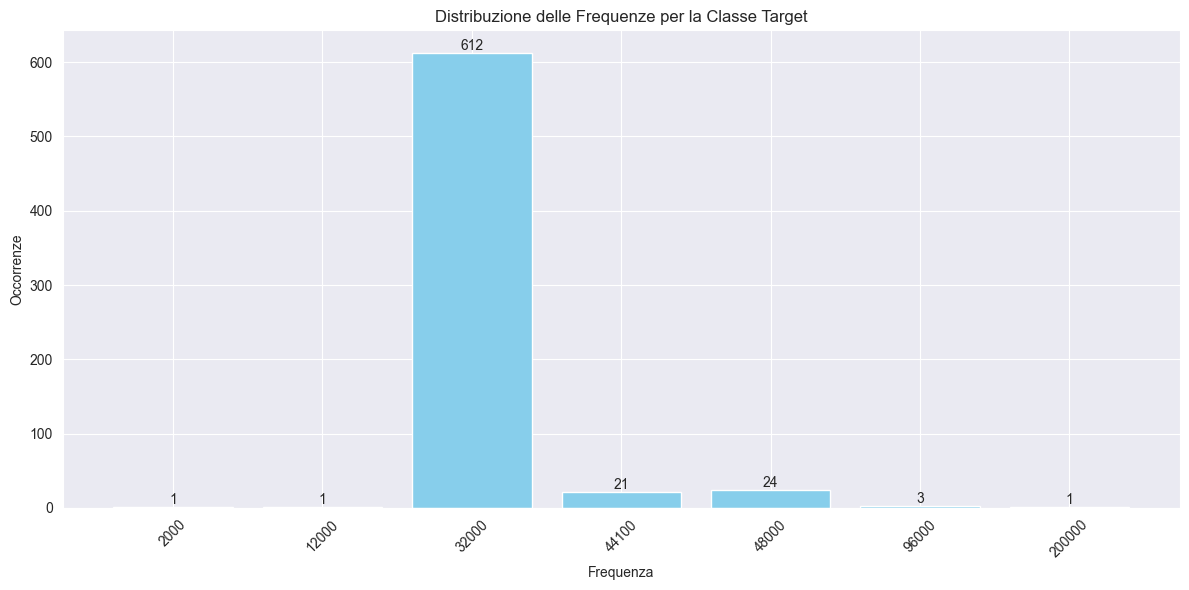

In [41]:
helper.plot_frequency_distribution(df_target)

sample rates nella classe Non-Target

Sample Rate Massimo: 384000
Sample Rate Minimo: 600


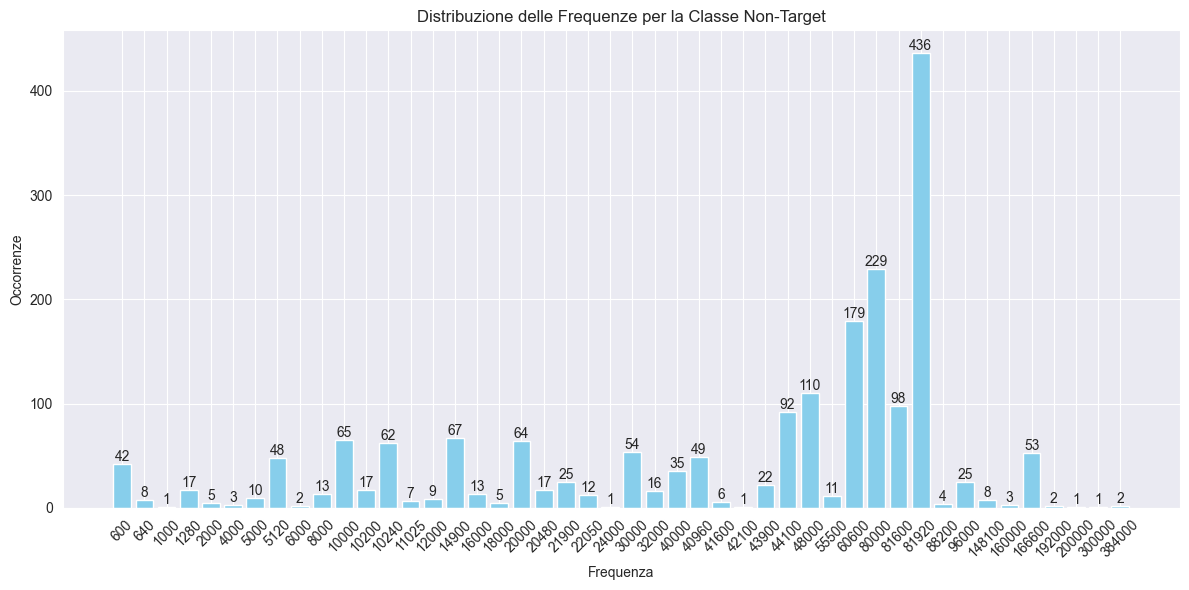

In [42]:
helper.plot_frequency_distribution_not(df_notarget)


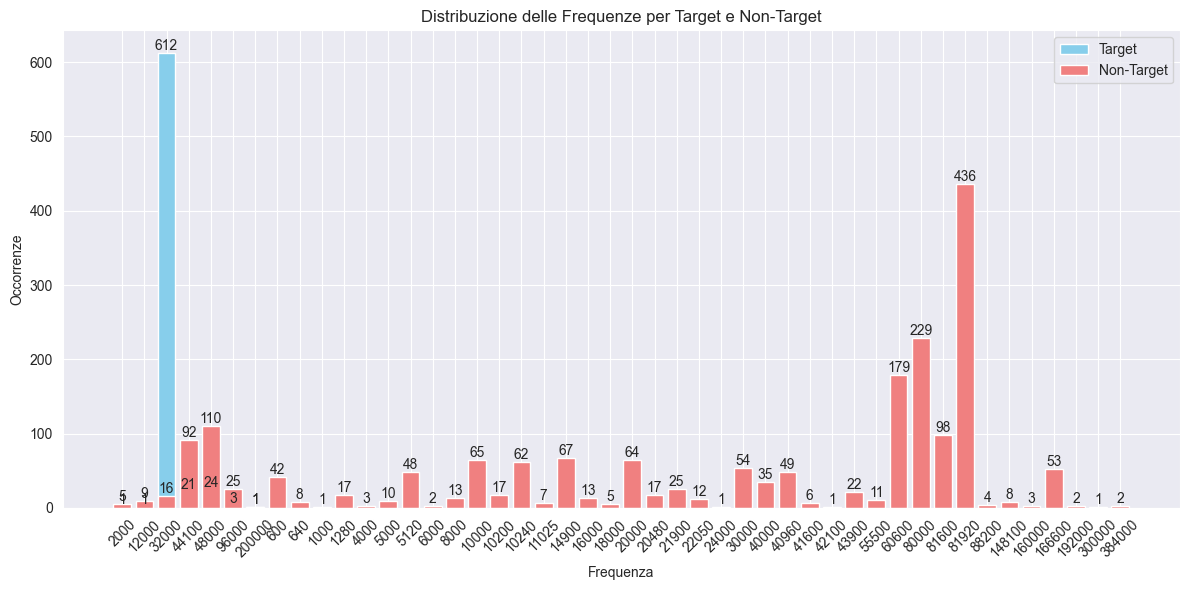

In [43]:
helper.plot_combined_frequency_distribution(df_target,df_notarget)

# Distribuzione durate audio

In [44]:
def plot_audio_durations_histogram(durations, bins=30):
    plt.figure(figsize=(12, 8))
    sns.histplot(durations, bins=bins, kde=True)
    plt.title('Distribuzione delle durate degli audio')
    plt.xlabel('Durata (secondi)')
    plt.ylabel('Frequenza')
    plt.grid(True)
    plt.show()

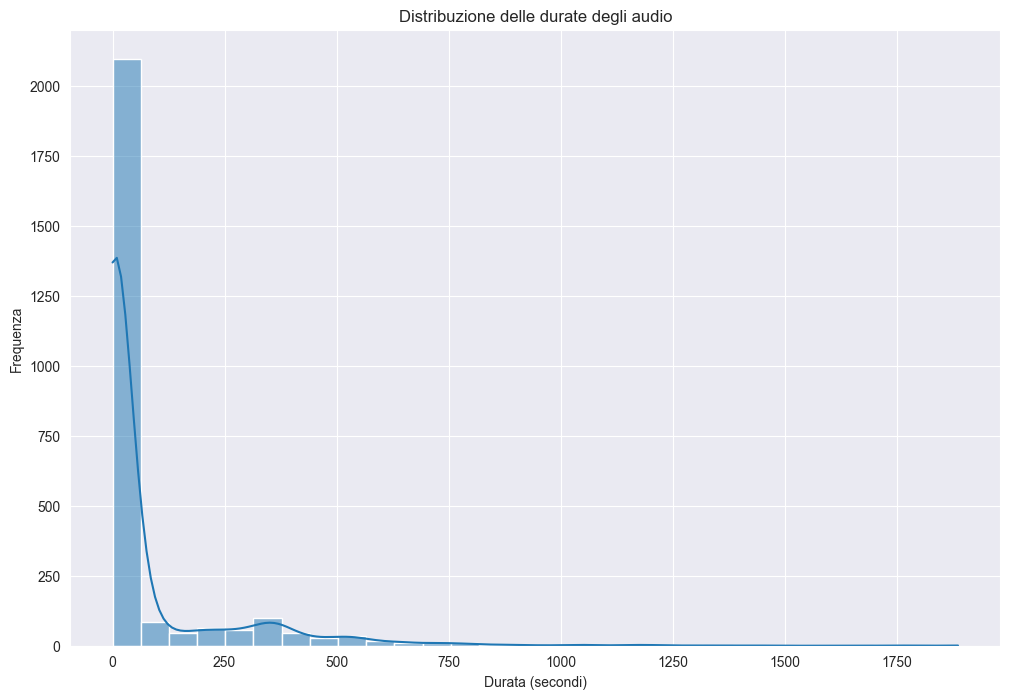

In [45]:
plot_audio_durations_histogram(durations)

distribuzione durate audio in Target

Max duration: 1887.0
Min duration: 3.3668934240362813


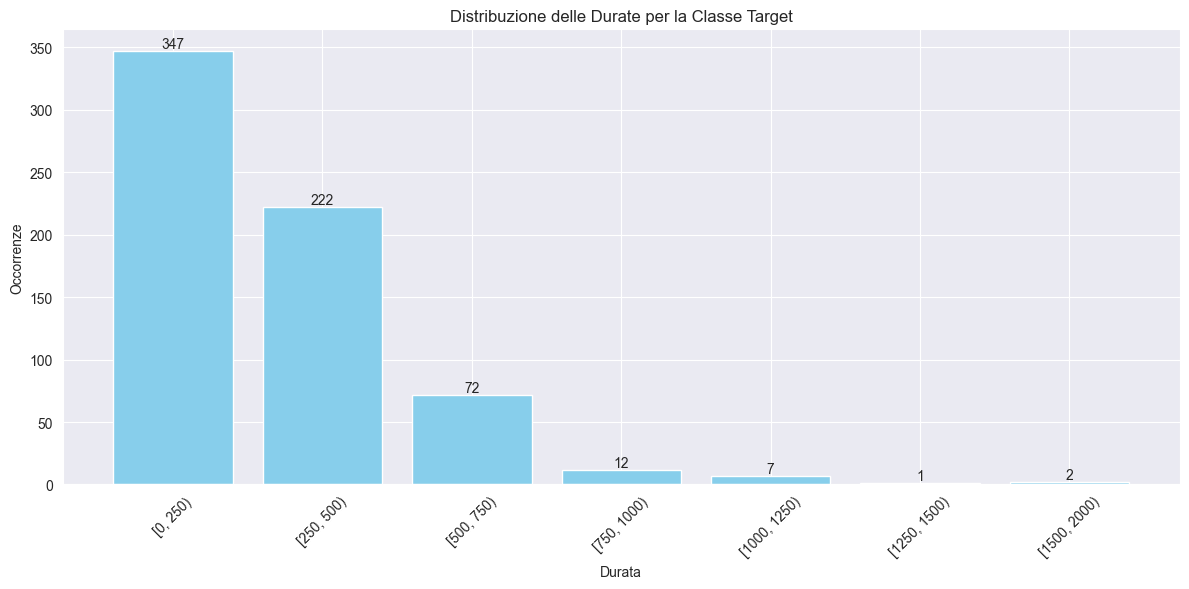

In [46]:
helper.plot_duration_target(df_target)

distribuzione durate audio in Non-Target

Max duration: 1423.805941043084
Min duration: 0.0536865234375


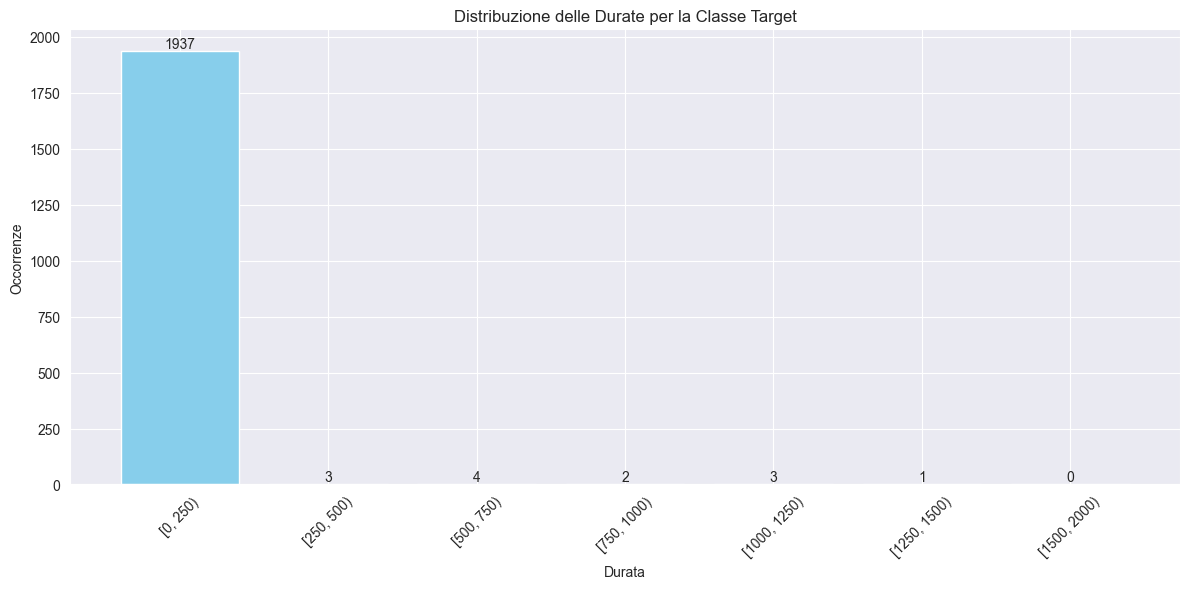

In [47]:
helper.plot_duration_target(df_notarget)

Distribuzione delle durate per entrambe le classi, con calcolo della mediana.

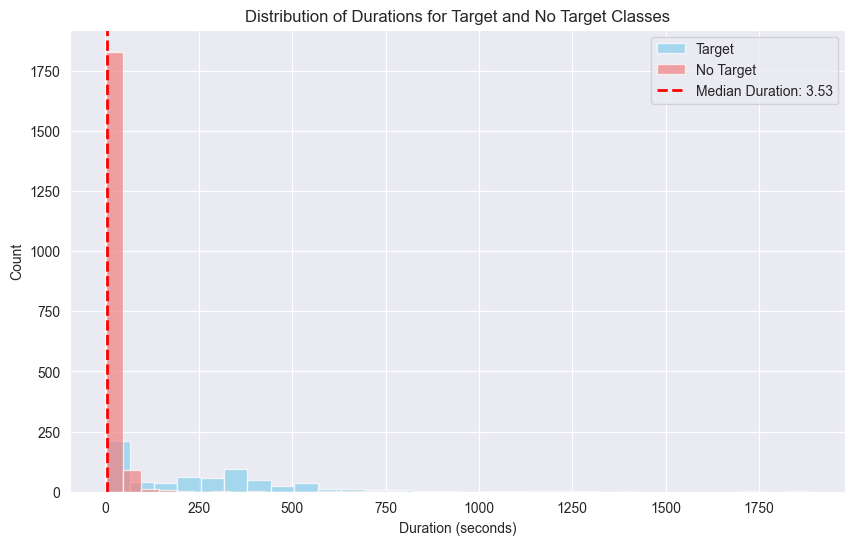

In [48]:
helper.plot_combined_duration_distribution(df_target, df_notarget)